Nh√≥m 4:

Nguy·ªÖn Anh Tu·∫•n - K214110827

Nguy·ªÖn Ng·ªçc Ph∆∞∆°ng Uy√™n - K214111322

Nguy·ªÖn H·ªìng Ng·ªçc √Ånh - K214110786

Tr·∫ßn Anh T√¢m - K214111952

Nguy·ªÖn Th·∫£o Nguy√™n - K214110812

#1. TI·ªÄN X·ª¨ L√ù - PRE-PROCESSING



ƒê·ªÉ th·ª±c hi·ªán ti·ªÅn x·ª≠ l√Ω cho b·ªô d·ªØ li·ªáu, tr∆∞·ªõc ti√™n nh√≥m ti·∫øn h√†nh import c√°c th∆∞ vi·ªán li√™n quan ƒë·ªÉ s·ª≠ d·ª•ng, trong ƒë√≥ bao g·ªìm:
*   Pandas - th∆∞ vi·ªán ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ x·ª≠ l√Ω v√† ph√¢n t√≠ch d·ªØ li·ªáu
*   emot - h·ªó tr·ª£ vi·ªác x·ª≠ l√Ω c·∫£m x√∫c trong vƒÉn b·∫£n b·∫±ng c√°ch nh·∫≠n di·ªán v√† thay th·∫ø c√°c bi·ªÉu c·∫£m c·∫£m x√∫c (emoji) trong vƒÉn b·∫£n th√†nh c√°c bi·ªÉu t∆∞·ª£ng ch·ªØ th∆∞·ªùng
*   py_vncorenlp - l√† m·ªôt th∆∞ vi·ªán cung c·∫•p c√°c ch·ª©c nƒÉng nh∆∞ ph√¢n ƒëo·∫°n t·ª´, g√°n nh√£n t·ª´ lo·∫°i, v√† nh·∫≠n d·∫°ng th·ª±c th·ªÉ trong vƒÉn b·∫£n ti·∫øng Vi·ªát
*   pickle - l√† m·ªôt c√°ch ƒë·ªÉ l∆∞u tr·ªØ v√† truy xu·∫•t c√°c ƒë·ªëi t∆∞·ª£ng Python d∆∞·ªõi d·∫°ng bi·ªÉu di·ªÖn nh·ªã ph√¢n
*   regex - l√† th∆∞ vi·ªán h·ªó tr·ª£ vi·ªác th·ª±c hi·ªán c√°c thao t√°c x·ª≠ l√Ω chu·ªói s·ª≠ d·ª•ng bi·ªÉu th·ª©c hc√≠nh quy (regular expressions)
*   underthesea - l√† th∆∞ vi·ªán x·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n cho ti·∫øng Vi·ªát
*   ftfy - Ftfy (fix text for you) l√† m·ªôt th∆∞ vi·ªán gi√∫p s·ª≠a c√°c v·∫•n ƒë·ªÅ li√™n quan ƒë·∫øn m√£ h√≥a v√† gi·∫£i m√£ vƒÉn b·∫£n, ƒë·∫£m b·∫£o r·∫±ng vƒÉn b·∫£n ƒë∆∞·ª£c hi·ªÉn th·ªã m·ªôt c√°ch ch√≠nh x√°c
*   unicodedata - cung c·∫•p c√°c h√†m ƒë·ªÉ th·ª±c hi·ªán c√°c ph√©p to√°n tr√™n k√Ω t·ª± Unicode
   


In [ ]:
import emot
emot_obj = emot.core.emot()

In [ ]:
import py_vncorenlp

py_vncorenlp.download_model(save_dir='/content')
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from os import path

root_path = '/content/gdrive/Shareddrives/PTDL WEB/BaÃÄi taÃ£ÃÇp + ƒêoÃÇÃÄ aÃÅn/ƒêoÃÇÃÄ aÃÅn/Code_Crawl_Data_Shoppe'
dataset_path = path.join(root_path, 'dataset')
raw_path = path.join(dataset_path, 'raw')
preprocessing_path = path.join(dataset_path, 'preprocessing')

!ls "$root_path"
!ls "$dataset_path"
!ls "$raw_path"

 dataset   documentation   fix.gdoc  'slangs update.gdoc'  'slangs update.txt'	 src
annotated  preprocessing  raw  review_1.xlsx  val_annotater
electric.p  fashion.p


In [ ]:
import pickle as pkl

with open(path.join(raw_path, 'fashion.p'), 'rb') as f:
  fashion_data = pkl.load(f)

In [ ]:
fashion_data[0].keys()

dict_keys(['itemid', 'shopid', 'name', 'currency', 'price', 'price_before_discount', 'raw_discount', 'item_rating', 'comment', 'item_rating_summary'])

In [ ]:
fashion_data[0]['comment'][0].keys()

dict_keys(['cmtid', 'comment', 'rating_star'])

In [ ]:
data_df = {
    'cmtid': [],
    'itemid': [],
    'name': [],
    'comment': [],
    'rating_star': []
}

for product in fashion_data:
  for cmt in product['comment']:

    data_df['cmtid'].append(int(cmt['cmtid']))
    data_df['itemid'].append(int(product['itemid']))

    data_df['comment'].append(cmt['comment'])
    data_df['rating_star'].append(cmt['rating_star'])

    data_df['name'].append(product['name'])


import pandas as pd

data_df = pd.DataFrame.from_dict(data_df)
data_df

cmtid       itemid  \
0      13239687733  23886482112   
1      13239626315  23886482112   
2      13239565011  23886482112   
3      13175587025  18894188708   
4      13253091864  18894188708   
...            ...          ...   
18388  13239421063  22386234995   
18389  13239621971  22386234995   
18390  13240092618  22386234995   
18391  13339211202  22386234995   
18392  13205014190  22386234995   

                                                    name  \
0                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
1                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
2                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
3      √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
4      √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
...                                                  ...   
18388  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
18389  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
18390  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
18391  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
18392  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   

                                                 comment  rating_star  
0      m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...            5  
1      h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n ph·∫©m tuy·ªát vo...            5  
2      Sp r·∫•t ƒë·∫πp ,th∆°m, shop giao si√™u nhanh, ch·∫•t v...            5  
3      M√†u s·∫Øc:ko\nCh·∫•t li·ªáu:ko cos\nƒê√∫ng v·ªõi m√¥ t·∫£:k...            1  
4      M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:c≈©ng OK\nCh·∫•t li·ªáu...            1  
...                                                  ...          ...  
18388  Xinh ph·∫øt. Ch·∫•t nhung m·ªÅm. ƒê∆∞·ªùng may, c√∫c kh√° ...            5  
18389  M63 45kg m·∫∑c sz L v·ª´a chi·ªÅu d√†i nha. H√†ng ƒë·∫πp ...            5  
18390  "Ch·∫•t li·ªáu nh∆∞ m√¥ t·∫£\nNh√¨n ƒë·∫πp, sang n√™n mua ƒë...            5  
18391  M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:ƒë√∫ng\nCh·∫•t li·ªáu:nh...            5  
18392                                                               5  

[18393 rows x 5 columns]

M·ªói d√≤ng trong b·ªô d·ªØ li·ªáu n√†y li√™n k·∫øt v·ªõi m·ªôt s·∫£n ph·∫©m c·ª• th·ªÉ. C·ªôt itemid ch·ª©a m√£ s·∫£n ph·∫©m m√† d√≤ng ƒë√°nh gi√° li√™n quan ƒë·∫øn. C·ªôt name ch·ª©a t√™n c·ªßa s·∫£n ph·∫©m ƒë√≥. ƒê·ªìng th·ªùi, m·ªói d√≤ng trong b·ªô d·ªØ li·ªáu n√†y c≈©ng ch·ª©a m·ªôt ƒë√°nh gi√° c·ª• th·ªÉ v·ªÅ s·∫£n ph·∫©m. C·ªôt comment ch·ª©a n·ªôi dung ƒë√°nh gi√° ƒë√≥.

Trong ƒë√≥:
- cmtid: M√£ ƒë√°nh gi√° l√† m·ªôt s·ªë duy nh·∫•t ƒë∆∞·ª£c Shopee g√°n cho m·ªói ƒë√°nh gi√°. M√£ n√†y ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ tham chi·∫øu ƒë·∫øn ƒë√°nh gi√° trong c√°c h·ªá th·ªëng c·ªßa Shopee.

- itemid: M√£ s·∫£n ph·∫©m l√† m·ªôt s·ªë duy nh·∫•t ƒë∆∞·ª£c Shopee g√°n cho m·ªói s·∫£n ph·∫©m. M√£ n√†y ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ tham chi·∫øu ƒë·∫øn s·∫£n ph·∫©m trong c√°c h·ªá th·ªëng c·ªßa Shopee.

- name: T√™n s·∫£n ph·∫©m l√† t√™n c·ªßa s·∫£n ph·∫©m ƒë∆∞·ª£c ƒë√°nh gi√°. T√™n n√†y ƒë∆∞·ª£c cung c·∫•p b·ªüi ng∆∞·ªùi b√°n s·∫£n ph·∫©m.

- comment: N·ªôi dung ƒë√°nh gi√° l√† vƒÉn b·∫£n ƒë∆∞·ª£c ng∆∞·ªùi mua vi·∫øt ƒë·ªÉ ƒë√°nh gi√° s·∫£n ph·∫©m. N·ªôi dung ƒë√°nh gi√° c√≥ th·ªÉ bao g·ªìm c√°c th√¥ng tin nh∆∞ ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m, d·ªãch v·ª• kh√°ch h√†ng, th·ªùi gian giao h√†ng,...

- rating_star: M·ª©c ƒë·ªô ƒë√°nh gi√° ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m c·ªßa ng∆∞·ªùi mua, ƒë∆∞·ª£c ƒë√°nh gi√° t·ª´ 1 sao ƒë·∫øn 5 sao.


In [ ]:
# @title data_df -> drop dup -> drop empty -> clean_df
dup_df = data_df.drop_duplicates(subset = ['comment'])
clean_df = dup_df.drop(dup_df[dup_df['comment'] == ''].index)

print("DUPLICATE :", len(data_df) - len(data_df.drop_duplicates(subset = ['comment'])))
print("EMPTY     :", len(data_df) - len(data_df.drop(data_df[data_df['comment'] == ''].index)))
print("FINAL     :", len(data_df) - len(clean_df))

clean_df = clean_df.reset_index(drop = True)
clean_df

DUPLICATE : 4088
EMPTY     : 3356
FINAL     : 4089


cmtid       itemid  \
0      13239687733  23886482112   
1      13239626315  23886482112   
2      13239565011  23886482112   
3      13175587025  18894188708   
4      13253091864  18894188708   
...            ...          ...   
14299  12768980268  22648063543   
14300  13249750307  22648063543   
14301  13239621971  22386234995   
14302  13240092618  22386234995   
14303  13339211202  22386234995   

                                                    name  \
0                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
1                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
2                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
3      √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
4      √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
...                                                  ...   
14299  Qu·∫ßn kaki t√∫i h·ªôp n·ªØ form su√¥ng r·ªông MIAA l∆∞ng...   
14300  Qu·∫ßn kaki t√∫i h·ªôp n·ªØ form su√¥ng r·ªông MIAA l∆∞ng...   
14301  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
14302  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
14303  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   

                                                 comment  rating_star  
0      m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...            5  
1      h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n ph·∫©m tuy·ªát vo...            5  
2      Sp r·∫•t ƒë·∫πp ,th∆°m, shop giao si√™u nhanh, ch·∫•t v...            5  
3      M√†u s·∫Øc:ko\nCh·∫•t li·ªáu:ko cos\nƒê√∫ng v·ªõi m√¥ t·∫£:k...            1  
4      M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:c≈©ng OK\nCh·∫•t li·ªáu...            1  
...                                                  ...          ...  
14299  Tr·ªùi ∆°i qu·∫ßn ƒë·∫πp x·ªâu t·ª•i b√¢y ∆°i, th·ªÅ mua ƒë∆∞·ª£c ...            5  
14300  Qu·∫ßn v·∫£i ƒë·∫πp, m√†u xinh l·∫Øm, form qu·∫ßn ∆∞ng nha,...            5  
14301  M63 45kg m·∫∑c sz L v·ª´a chi·ªÅu d√†i nha. H√†ng ƒë·∫πp ...            5  
14302  "Ch·∫•t li·ªáu nh∆∞ m√¥ t·∫£\nNh√¨n ƒë·∫πp, sang n√™n mua ƒë...            5  
14303  M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:ƒë√∫ng\nCh·∫•t li·ªáu:nh...            5  

[14304 rows x 5 columns]

Sau khi quan s√°t nh√≥m nh·∫≠n th·∫•y c√≥ nh·ªØng comment b·ªã l·∫∑p l·∫°i ho·∫∑c nh·ªØng comment b·ªã r·ªóng n√™n s·∫Ω th·ª±c hi·ªán xo√° nh·ªØng d√≤ng d·ªØ li·ªáu n√†y:

1. dup_df = data_df.drop_duplicates(subset=['comment']): Lo·∫°i b·ªè c√°c d√≤ng tr√πng l·∫∑p d·ª±a tr√™n c·ªôt 'comment'. K·∫øt qu·∫£ l√† dup_df s·∫Ω l√† m·ªôt DataFrame m·ªõi kh√¥ng ch·ª©a c√°c b√¨nh lu·∫≠n tr√πng l·∫∑p.

2. clean_df = dup_df.drop(dup_df[dup_df['comment'] == ''].index): Lo·∫°i b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã r·ªóng trong c·ªôt 'comment'. N·∫øu m·ªôt d√≤ng c√≥ 'comment' r·ªóng, n√≥ s·∫Ω ƒë∆∞·ª£c lo·∫°i b·ªè kh·ªèi DataFrame dup_df. K·∫øt qu·∫£ l√† clean_df l√† DataFrame cu·ªëi c√πng sau khi lo·∫°i b·ªè c√°c b√¨nh lu·∫≠n tr√πng l·∫∑p v√† c√°c b√¨nh lu·∫≠n r·ªóng.

3. clean_df = clean_df.reset_index(drop=True): Reset index c·ªßa DataFrame clean_df ƒë·ªÉ c√≥ index li√™n t·ª•c t·ª´ 0 ƒë·∫øn len(clean_df) - 1.

Do comment b·ªã r·ªóng v√† c√°c comment b·ªã l·∫∑p b·ªã overlap n√™n c·∫ßn ph·∫£i x·ª≠ l√Ω c·∫£ hai tr∆∞·ªùng h·ª£p n√†y ƒë·ªÉ l√†m s·∫°ch d·ªØ li·ªáu t·ªët nh·∫•t.

**T·ªïng s·ªë c√°c d√≤ng b·ªã lo·∫°i b·ªè v√¨ b·ªã tr√πng l·∫∑p v√† b·ªã r·ªóng l√† 4088 d√≤ng, do ƒë√≥ b·ªô d·ªØ li·∫πu c√≤n l·∫°i 14304 d√≤ng.**


In [ ]:
tests = clean_df['comment'][:100].values.tolist()
tests

['m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho 10 ƒëi√™m',
 'h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n ph·∫©m tuy·ªát voiii nen mua nhaa',
 'Sp r·∫•t ƒë·∫πp ,th∆°m, shop giao si√™u nhanh, ch·∫•t v·∫£i x·ªãn d√£ man',
 'M√†u s·∫Øc:ko\nCh·∫•t li·ªáu:ko cos\nƒê√∫ng v·ªõi m√¥ t·∫£:ko\n\nCh·∫•t l∆∞·ª£ng s·∫£n ph·∫©m k√©m \nK\nNhu c·∫ßu mua l·∫°i kh√¥ng bao gi·ªù\nƒê·ªô l·ª´a ƒë·∫£o qu√° cao nh√© mng',
 'M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:c≈©ng OK\nCh·∫•t li·ªáu:ch∆∞a th·∫•y\n\nV√¨ r·∫ª l√™n ƒë√°nh gi√° 5* v√¨ kg ·ªü nh√† nh∆∞ng v·∫´n c·∫£m ∆°n shop 45k. C√≥ ƒê·ª©c qu√°',
 'ƒê√∫ng v·ªõi m√¥ t·∫£:mua ao giao. C√°i kh√°c\n\nNh·∫Øn tin shop k tl \nT·ªá\nShop k uy t√≠n',
 'ƒê√∫ng v·ªõi m√¥ t·∫£:kh√¥ng ƒë√∫ng\n\nƒê·∫∑t √°o l√¥ng giao qu·∫ßn tr·∫ª con :)) ƒë√£ th·∫ø qu·∫ßn c√≤n b·∫©n v√† c≈©',
 'ƒê√∫ng v·ªõi m√¥ t·∫£:kh√¥ng\nCh·∫•t li·ªáu:kh√¥ng ƒë√∫ng v·ªõi ƒë∆°n h√†ng ƒë√£ ƒë·∫∑t\nM√†u s·∫Øc:tr·∫Øng n√¢u ƒëen\n\nR√µ r√†ng ƒë·∫∑t 1 l·∫ßn 5 √°o nh∆∞ng giao v·ªÅ ch·ªâ c√≥ 1 √°o\

In [ ]:
!git clone https://github.com/v-nhandt21/Vinorm.git
!ls

Cloning into 'Vinorm'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 125 (delta 4), reused 3 (delta 3), pack-reused 120
Receiving objects: 100% (125/125), 202.66 MiB | 32.45 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (128/128), done.
gdrive	models	sample_data  Vinorm  VnCoreNLP-1.2.jar


In [ ]:
import os

slangs_dict = {}
for file in os.listdir('Vinorm/vinorm/Mapping'):
  if file not in ['Teencode.txt', 'Number.txt']:
    continue

  print(file, ':', end = ' ')
  file_path = 'Vinorm/vinorm/Mapping/' + file

  with open(file_path, 'r', encoding = 'utf8') as f:
    data_slangs = f.readlines()
    print(len(data_slangs))

    for i in data_slangs:
      i = i.replace("\n", "").lower().strip()
      i = i.split("#")

      for punc in ['(', ')', '.', '+', '*']:
        i[0] = i[0].replace(punc, '\\' + punc)

      slangs_dict[i[0]] = i[1]

slangs_dict.update({
    'sp': 's·∫£n ph·∫©m',
    'tl': 'tr·∫£ l·ªùi',
    'mn': 'm·ªçi ng∆∞·ªùi',
    'mng': 'm·ªçi ng∆∞·ªùi',
    'mngf': 'm·ªçi ng∆∞·ªùi',
    'h': 'gi·ªù',
    'v': 'v·∫≠y',
    'cgi': 'c√°i g√¨',
    'vs': 'v·ªõi',
    'sv': 'sinh vi√™n',
    'sop': 'shop',
    'lmj': 'l√†m g√¨',
    'e': 'em',
    'dc': 'ƒë∆∞·ª£c',
    'nx': 'n·ªØa',
    'kg': 'kh√¥ng',
    'bt': 'bi·∫øt',
    'l': 'l√†m',
    'ntin': 'nh·∫Øn tin',
    'j': 'g√¨',
    'v': 'v·∫≠y',
    'lm': 'l√†m',
    't': 'tao',
    's': 'sao',
    'ngta': 'ng∆∞·ªùi ta',
    'z': 'v·∫≠y',
    'nt': 'nh·∫Øn tin',
    'ib': 'inbox',
    'lh': 'li√™n h·ªá',
    'kh': 'kh√¥ng'
})

len(slangs_dict)

Number.txt : 10
Teencode.txt : 484


521

Nh√≥m c·∫≠p nh·∫≠t th√™m c√°c t·ª´ ƒë·∫∑c bi·ªát v√†o t·ª´ ƒëi·ªÉn slangs_dict c·ªßa vinorm, ƒë√¢y l√† t·ª´ ƒëi·ªÉn ch·ª©a nh·ªØng t·ª´ vi·∫øt t·∫Øt v√† teencode ƒë·ªÉ s·ª≠ d·ª•ng cho vi·ªác thay th·∫ø nh·ªØng t·ª´ ng·ªØ vi·∫øt t·∫Øt v√† teencode n√†y chuy·ªÉn th√†nh t·ª´ ng·ªØ chu·∫©n. B√™n c·∫°nh ƒë√≥, khi th·ª±c hi·ªán g√°n d·ªØ li·ªáu nh√≥m c√≥ th·ª±c hi·ªán l∆∞u l·∫°i nh·ªØng t·ª´ ng·ªØ vi·∫øt t·∫Øt kh√°c v√† c·∫≠p nh·∫≠t v√†o t·ª´ ƒëi·ªÉn slangs_dict b·∫±ng c√°ch update t·ª´ ƒëi·ªÉn n√†y th∆∞·ªùng xuy√™n.

**Sau khi th·ª±c hi·ªán nh√≥m thu ƒë∆∞·ª£c m·ªôt t·ª´ ƒëi·ªÉn t·ª´ ng·ªØ vi·∫øt t·∫Øt v√† teencode g·ªìm : 521 t·ª´**



In [ ]:
import regex as re

with open(path.join(root_path, 'slangs update.txt'), 'r', encoding = 'utf8') as f:
  data = f.readlines()
  data = [re.sub(r'[,‚Äò‚Äô\';]', '', i).lower() for i in data]
  data = [i.replace('\n', '').replace('\ufeff', '') for i in data]
  new_slang = {}

  for i in data:
    j = i.split(":")
    new_slang[j[0].strip()] = j[1].strip()
slangs_dict.update(new_slang)
len(slangs_dict)

606

Nh√≥m th·ª±c hi·ªán vi·ªác c·∫≠p nh·∫≠t t·ª´ ƒëi·ªÉn slangs_dict b·∫±ng c√°ch ƒë·ªçc d·ªØ li·ªáu t·ª´ m·ªôt t·ªáp tin vƒÉn b·∫£n 'slangs update.txt' v√† th√™m v√†o c√°c √°nh x·∫° m·ªõi.

**T·ª´ ƒëi·ªÉn v·ªÅ t·ª´ ng·ªØ vi·∫øt t·∫Øt v√† teencode cu·ªëi c√πng c·ªßa nh√≥m l√† 606 t·ª´**

In [ ]:
VIETNAMESE_TEXT = '√†√°√£·∫°·∫£ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√®√©·∫π·∫ª·∫Ω√™·ªÅ·∫ø·ªÉ·ªÖ·ªáƒë√¨√≠ƒ©·ªâ·ªã√≤√≥√µ·ªç·ªè√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√π√∫≈©·ª•·ªß∆∞·ª©·ª´·ª≠·ªØ·ª±·ª≥·ªµ·ª∑·ªπ√Ω√Ä√Å√É·∫†·∫¢ƒÇ·∫Æ·∫∞·∫≤·∫¥·∫∂√Ç·∫§·∫¶·∫®·∫™·∫¨√à√â·∫∏·∫∫·∫º√ä·ªÄ·∫æ·ªÇ·ªÑ·ªÜƒê√å√çƒ®·ªà·ªä√í√ì√ï·ªå·ªé√î·ªê·ªí·ªî·ªñ·ªò∆†·ªö·ªú·ªû·ª†·ª¢√ô√ö≈®·ª§·ª¶∆Ø·ª®·ª™·ª¨·ªÆ·ª∞·ª≤·ª¥·ª∂·ª∏'
LATIN_VI = r'[A-Za-z' + VIETNAMESE_TEXT + r']'

regex_dict = {
    r'(?<=\d+\s)k\b': 'ngh√¨n',
    r'(?<=\d+\s)m(?=\s\d+)\b': 'm√©t',
    r'(?<=\d+\s)kg\b': 'kilogram',
    r'(?<=size\s)s\b': 'nh·ªè',
    r'(?<=size\s)m\b': 'trung b√¨nh',
    r'(?<=size\s)l\b': 'l·ªõn',
    r'(?<=size\s)xl\b': 'r·∫•t l·ªõn',
    r'(?<=size\s)xxl\b': 'r·∫•t r·∫•t l·ªõn',
}

Do t√≠nh ch·∫•t ƒë·∫∑c bi·ªát c·ªßa ng√†nh h√†ng Th·ªùi trang, c√°c comment c√≥ th·ªÉ ch·ª©a th√¥ng tin v·ªÅ k√≠ch th∆∞·ªõc, chi·ªÅu cao, c√¢n n·∫∑ng c·ªßa kh√°ch h√†ng d∆∞·ªõi d·∫°ng vi·∫øt t·∫Øt nh∆∞ S, M, L. ƒê·∫ø tr√°ch vi·ªác chuy·ªÉn ƒë·ªïi t·ª´ vi·∫øt t·∫Øt b·ªã sai, nh√≥m ti·∫øng h√†nh x√¢y d·ª•ng t·ª´ ƒëi·ªÉn cho c√°c nh√≥m t·ª´ n√†y.

Nh√≥m s·ª≠ d·ª•ng h√†m demoji ƒë·ªÉ chuy·ªÉn ƒë·ªïi emoji v√† emoticon th√†nh vƒÉn b·∫£n. V√† s·ª≠ d·ª•ng h√†m pre_processing ƒë·ªÉ ti·ªÅn x·ª≠ l√Ω n·ªôi dung c·ªßa comment bao g·ªìm:
- Chuy·ªÉn ƒë·ªïi to√†n b·ªô vƒÉn b·∫£n th√†nh ch·ªØ th∆∞·ªùng
- Chu·∫©n h√≥a unicode ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng c√°c k√Ω t·ª± ƒë∆∞·ª£c bi·ªÉu di·ªÖn theo m·ªôt c√°ch duy nh·∫•t
- Thay th·∫ø k√Ω t·ª± xu·ªëng d√≤ng b·∫±ng kho·∫£ng tr·∫Øng
- Lo·∫°i b·ªè kho·∫£ng tr·∫Øng th·ª´a
- S·ª≠a c√°c l·ªói ch√≠nh t·∫£ v√† bi·ªÉu hi·ªán vƒÉn b·∫£n.
- Chu·∫©n h√≥a vƒÉn b·∫£n s·ª≠ d·ª•ng underthesea
- Lo·∫°i b·ªè d·∫•u c√¢u v√† c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát kh√°c
- S·ª≠a c√°c t·ª´ vi·∫øt t·∫Øt b·∫±ng c√°ch thay th·∫ø ch√∫ng theo t·ª´ ƒëi·ªÉn slangs_dict
- S·ª≠ d·ª•ng py_vncorenlp ƒë·ªÉ t√°ch t·ª´

Cu·ªëi c√πng h√†m s·∫Ω tr·∫£ v·ªÅ vƒÉn b·∫£n ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω.

In [ ]:
import underthesea as u
import ftfy
import string
import unicodedata

def demoji(text):

  text = text.strip()
  text = ' ' + text + ' '

  emojis = emot_obj.emoji(text)
  emoticons = emot_obj.emoticons(text)
  for k, v in zip(emojis['value'] + emoticons['value'], emojis['mean'] + emoticons['mean']):

    for punc in ['(', ')', '.', '+', '*']:
      k = k.replace(punc, '\\' + punc)

    v = v.replace(':', '')
    v = '<emoji>' + v + '</emoji>'

    pattern = r'\s' + k + r'\s'
    text = re.sub(pattern, ' ' + v + ' ', text)

  text = text.lower()
  text = text.strip()

  return text

def pre_processing(text):

  text = text.lower()
  text = unicodedata.normalize('NFC', text)

  # Clean space
  text = text.replace("\n", " ")
  text = re.sub(r'\s+', ' ', text)

  # Fix encoding, punc
  text = text.strip()
  text = ftfy.fix_encoding(text)
  text = ftfy.fix_text(text)
  text = u.text_normalize(text)

  # Turn emoji, emoticon to text
  text = demoji(text)

  # Fix dup punc
  text = re.sub(r'([!"#$%&\'()*+,\-\.\/:;<=>?@[\\\]^_`{|}~])(?:\s*\1)+', r' \1 ', text)
  text = re.sub(r'\s+', ' ', text)

  # Remove punc
  text = re.sub(r'[!"#$%&\'()*+,\-\.:;=?@[\\\]^_`{|}~]', ' ', text)
  text = re.sub(r'<(?!\/?[^\s]+>)|(?<!<\/?[^\s]+)>|(?<!<)\/(?![^\s]+>)', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  # Normalize with regex
  text = re.sub(r'((?<!' + LATIN_VI + r'\s?)' + LATIN_VI + r'{1,3}(?!' + LATIN_VI + r'\s?))', r' \1 ', text)
  text = text.strip()
  text = re.sub(r'\s+', ' ', text)
  for pattern, value in regex_dict.items():
    text = re.sub(pattern, value, text)

  # Fix slang
  text = " ".join([slangs_dict.get(word, word) for word in text.split()])

  # Word segment
  try:
    text = rdrsegmenter.word_segment(text)[0]
  except:
    pass

  # Fix token
  text = re.sub(r'<\s?(\/)?\s([^\s]+)\s>', r'<\1\2>', text)

  text = re.sub(r'\s+', ' ', text)
  return text.strip()

for test in tests:
  print(pre_processing(test))
  print()

print("=" * 50)


m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho 10 ƒëi√™m

h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n_ph·∫©m tuy·ªát voiii nen mua nhaa

s·∫£n_ph·∫©m r·∫•t ƒë·∫πp th∆°m shop giao si√™u nhanh ch·∫•t v·∫£i x·ªãn d√£_man

m√†u_s·∫Øc kh√¥ng ch·∫•t_li·ªáu kh√¥ng cos ƒë√∫ng v·ªõi m√¥_t·∫£ kh√¥ng ch·∫•t_l∆∞·ª£ng s·∫£n_ph·∫©m k√©m kh√¥ng nhu_c·∫ßu mua l·∫°i kh√¥ng bao_gi·ªù ƒë·ªô l·ª´a_ƒë·∫£o qu√° cao nh√© m·ªçi ng∆∞·ªùi

m√†u s·∫Øc ƒëen ƒë√∫ng v·ªõi m√¥_t·∫£ c≈©ng ok ch·∫•t_li·ªáu ch∆∞a th·∫•y v√¨ r·∫ª l√™n ƒë√°nh_gi√° nƒÉm v√¨ kh√¥ng ·ªü nh√† nh∆∞ng v·∫´n c·∫£m_∆°n shop 45 ngh√¨n c√≥ ƒë·ª©c qu√°

ƒë√∫ng v·ªõi m√¥_t·∫£ mua ao giao c√°i kh√°c nh·∫Øn_tin shop kh√¥ng tr·∫£_l·ªùi t·ªá shop kh√¥ng uy_t√≠n

ƒë√∫ng v·ªõi m√¥_t·∫£ kh√¥ng ƒë√∫ng ƒë·∫∑t √°o l√¥ng giao qu·∫ßn tr·∫ª_con <emoji> very happy face or smiley </emoji> ƒë√£ th·∫ø qu·∫ßn c√≤n b·∫©n v√† c≈©

ƒë√∫ng v·ªõi m√¥_t·∫£ kh√¥ng ch·∫•t_li·ªáu kh√¥ng ƒë√∫ng v·ªõi ƒë∆°n h√†ng ƒë√£ ƒë·∫∑t m√†u_s·∫Øc tr·∫Øng n√¢u ƒëen r√µ_r√†ng ƒë

In [ ]:
clean_df['clean_cmt'] = clean_df['comment'].apply(pre_processing)
clean_df = clean_df.drop(clean_df[clean_df['clean_cmt'] == ''].index)
clean_df = clean_df.reset_index(drop = True)

In [ ]:
clean_df

cmtid       itemid  \
0      13239687733  23886482112   
1      13239626315  23886482112   
2      13239565011  23886482112   
3      13175587025  18894188708   
4      13253091864  18894188708   
...            ...          ...   
14298  12768980268  22648063543   
14299  13249750307  22648063543   
14300  13239621971  22386234995   
14301  13240092618  22386234995   
14302  13339211202  22386234995   

                                                    name  \
0                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
1                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
2                    √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
3      √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
4      √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
...                                                  ...   
14298  Qu·∫ßn kaki t√∫i h·ªôp n·ªØ form su√¥ng r·ªông MIAA l∆∞ng...   
14299  Qu·∫ßn kaki t√∫i h·ªôp n·ªØ form su√¥ng r·ªông MIAA l∆∞ng...   
14300  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
14301  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   
14302  N07 S√©t Nhung QC Ph·ªëi Vi·ªÅn, S√©t B·ªô Ng·ªß Cho N·ªØ ...   

                                                 comment  rating_star  \
0      m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...            5   
1      h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n ph·∫©m tuy·ªát vo...            5   
2      Sp r·∫•t ƒë·∫πp ,th∆°m, shop giao si√™u nhanh, ch·∫•t v...            5   
3      M√†u s·∫Øc:ko\nCh·∫•t li·ªáu:ko cos\nƒê√∫ng v·ªõi m√¥ t·∫£:k...            1   
4      M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:c≈©ng OK\nCh·∫•t li·ªáu...            1   
...                                                  ...          ...   
14298  Tr·ªùi ∆°i qu·∫ßn ƒë·∫πp x·ªâu t·ª•i b√¢y ∆°i, th·ªÅ mua ƒë∆∞·ª£c ...            5   
14299  Qu·∫ßn v·∫£i ƒë·∫πp, m√†u xinh l·∫Øm, form qu·∫ßn ∆∞ng nha,...            5   
14300  M63 45kg m·∫∑c sz L v·ª´a chi·ªÅu d√†i nha. H√†ng ƒë·∫πp ...            5   
14301  "Ch·∫•t li·ªáu nh∆∞ m√¥ t·∫£\nNh√¨n ƒë·∫πp, sang n√™n mua ƒë...            5   
14302  M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:ƒë√∫ng\nCh·∫•t li·ªáu:nh...            5   

                                               clean_cmt  
0      m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...  
1      h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n_ph·∫©m tuy·ªát vo...  
2      s·∫£n_ph·∫©m r·∫•t ƒë·∫πp th∆°m shop giao si√™u nhanh ch·∫•...  
3      m√†u_s·∫Øc kh√¥ng ch·∫•t_li·ªáu kh√¥ng cos ƒë√∫ng v·ªõi m√¥_...  
4      m√†u s·∫Øc ƒëen ƒë√∫ng v·ªõi m√¥_t·∫£ c≈©ng ok ch·∫•t_li·ªáu c...  
...                                                  ...  
14298  tr·ªùi_∆°i qu·∫ßn ƒë·∫πp x·ªâu t·ª•i b√¢y ∆°i th·ªÅ mua ƒë∆∞·ª£c c...  
14299  qu·∫ßn v·∫£i ƒë·∫πp m√†u xinh l·∫Øm form qu·∫ßn ∆∞ng nha gi...  
14300  m 63 45 kilogram m·∫∑c size l√†m v·ª´a chi·ªÅu d√†i nh...  
14301  ch·∫•t_li·ªáu nh∆∞ m√¥_t·∫£ nh√¨n ƒë·∫πp sang n√™n mua ƒë·ªÉ m...  
14302  m√†u s·∫Øc ƒëen ƒë√∫ng v·ªõi m√¥_t·∫£ ƒë√∫ng ch·∫•t_li·ªáu nhun...  

[14303 rows x 6 columns]

**Sau khi th·ª±c hi·ªán pre-processing, nh√≥m thu ƒë∆∞·ª£c th√™m 1 c·ªôt d·ªØ li·ªáu 'clean_cmt' ƒë·ªÉ ti·∫øp t·ª•c nh·ªØng b∆∞·ªõc sau**

In [ ]:
clean_df.to_csv(path.join(preprocessing_path, 'fashion_v2.csv'), index = False, header = True, encoding = 'utf8')

#2. KHAI PH√Å D·ªÆ LI·ªÜU - EDA

ƒê·ªÉ th·ª±c hi·ªán EDA cho b·ªô d·ªØ li·ªáu, tr∆∞·ªõc ti√™n nh√≥m ti·∫øn h√†nh import c√°c th∆∞ vi·ªán li√™n quan ƒë·ªÉ s·ª≠ d·ª•ng, trong ƒë√≥ bao g·ªìm:
*   Pandas - th∆∞ vi·ªán ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ x·ª≠ l√Ω v√† ph√¢n t√≠ch d·ªØ li·ªáu
*   Matplotlib - th∆∞ vi·ªán v·∫Ω ƒë·ªì th·ªã v√† bi·ªÉu ƒë·ªì
*   NumPy - th∆∞ vi·ªán cung c·∫•p h·ªó tr·ª£ cho vi·ªác l√†m vi·ªác v·ªõi m·∫£ng ƒëa chi·ªÅu v√† ma tr·∫≠n
*   NLTK - th∆∞ vi·ªán x·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n
*   Seaborn - th∆∞ vi·ªán tr·ª±c quan h√≥a d·ªØ li·ªáu d·ª±a tr√™n Matplotlib
*   Scikit-learn - th∆∞ vi·ªán h·ªçc m√°y
*   Gensim - th∆∞ vi·ªán ƒë∆∞·ª£c s·ª≠ d·ª•ng cho vi·ªác m√¥ h√¨nh h√≥a ch·ªß ƒë·ªÅ v√† ph√¢n t√≠ch ƒë·ªô t∆∞∆°ng ƒë·ªìng gi·ªØa c√°c vƒÉn b·∫£n











In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import sklearn
import gensim

In [ ]:
comments= pd.read_csv('/content/gdrive/Shareddrives/PTDL WEB/BaÃÄi taÃ£ÃÇp + ƒêoÃÇÃÄ aÃÅn/ƒêoÃÇÃÄ aÃÅn/Code_Crawl_Data_Shoppe/dataset/preprocessing/fashion_v2.csv')
comments.head(6)

cmtid       itemid  \
0  13239687733  23886482112   
1  13239626315  23886482112   
2  13239565011  23886482112   
3  13175587025  18894188708   
4  13253091864  18894188708   
5  13194946753  18894188708   

                                                name  \
0                √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
1                √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
2                √Åo len cardigan tr∆°n d√°ng r·ªông AO26   
3  √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
4  √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   
5  √Åo Kho√°c Thom , √Åo Kho√°c L√¥ng C·ª´u 4 S·ªçc C√°nh T...   

                                             comment  rating_star  \
0  m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...            5   
1  h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n ph·∫©m tuy·ªát vo...            5   
2  Sp r·∫•t ƒë·∫πp ,th∆°m, shop giao si√™u nhanh, ch·∫•t v...            5   
3  M√†u s·∫Øc:ko\nCh·∫•t li·ªáu:ko cos\nƒê√∫ng v·ªõi m√¥ t·∫£:k...            1   
4  M√†u s·∫Øc:ƒëen\nƒê√∫ng v·ªõi m√¥ t·∫£:c≈©ng OK\nCh·∫•t li·ªáu...            1   
5  ƒê√∫ng v·ªõi m√¥ t·∫£:mua ao giao. C√°i kh√°c\n\nNh·∫Øn t...            1   

                                           clean_cmt  
0  m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...  
1  h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n_ph·∫©m tuy·ªát vo...  
2  s·∫£n_ph·∫©m r·∫•t ƒë·∫πp th∆°m shop giao si√™u nhanh ch·∫•...  
3  m√†u_s·∫Øc kh√¥ng ch·∫•t_li·ªáu kh√¥ng cos ƒë√∫ng v·ªõi m√¥_...  
4  m√†u s·∫Øc ƒëen ƒë√∫ng v·ªõi m√¥_t·∫£ c≈©ng ok ch·∫•t_li·ªáu c...  
5  ƒë√∫ng v·ªõi m√¥_t·∫£ mua ao giao c√°i kh√°c nh·∫Øn_tin s...

In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cmtid             14303 non-null  int64  
 1   itemid            14303 non-null  int64  
 2   name              14303 non-null  object 
 3   comment           14303 non-null  object 
 4   rating_star       14303 non-null  int64  
 5   clean_cmt         14303 non-null  object 
 6   char_count        14303 non-null  int64  
 7   clean_cmt_tokens  14303 non-null  object 
 8   trigrams          14303 non-null  object 
 9   word_count        14303 non-null  int64  
 10  avg_word_length   14303 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.2+ MB


T·∫°i ƒë√¢y, ch√∫ng ta th·∫•y ƒë∆∞·ª£c c√°c th√¥ng tin c∆° b·∫£n c·ªßa c√°c c·ªôt c√≥ trong d·ªØ li·ªáu, bao g·ªìm 5 bi·∫øn, kh√¥ng c√≥ gi√° tr·ªã missing value, c≈©ng nh∆∞ l√† th·∫•y ƒë∆∞·ª£c ki·ªÉu d·ªØ li·ªáu c·ªßa c√°c bi·∫øn ƒë∆∞·ª£c s·ª≠ d·ª•ng:
*   RangeIndex: 14303 entries, 0 to 14302: ƒê√¢y l√† ch·ªâ s·ªë c·ªßa DataFrame, cho bi·∫øt c√≥ t·ªïng c·ªông 14303 d√≤ng (entries) t·ª´ 0 ƒë·∫øn 14303.
*   Data columns (total 6 columns): ƒê√¢y l√† th√¥ng tin v·ªÅ c√°c c·ªôt d·ªØ li·ªáu trong DataFrame, t·ªïng c·ªông c√≥ 6 c·ªôt.
> C√°c c·ªôt d·ªØ li·ªáu ƒë∆∞·ª£c li·ªát k√™ d∆∞·ªõi ƒë√¢y, bao g·ªìm:
*   #: C·ªôt d·ªØ li·ªáu ch·ª©a c√°c gi√° tr·ªã ch·ªâ s·ªë (index) c·ªßa DataFrame.
*  name, comment, clean_cmt: C√°c c·ªôt d·ªØ li·ªáu c√≥ ki·ªÉu d·ªØ li·ªáu object, l∆∞u tr·ªØ th√¥ng tin v·ªÅ t√™n s·∫£n ph·∫©m, comment c·ªßa s·∫£n ph·∫©m ch∆∞a x·ª≠ l√Ω v√† comment ƒë√£ qua ti·ªÅn x·ª≠ l√Ω.
*   cmtid, itemid, rating_star: C√°c c·ªôt d·ªØ li·ªáu c√≥ ki·ªÉu d·ªØ li·ªáu int64, l∆∞u tr·ªØ th√¥ng tin v·ªÅ id c·ªßa comment, id c·ªßa s·∫£n ph·∫©m v√† rating c·ªßa s·∫£n ph·∫©m.
*   non-null Count: ƒê√¢y l√† s·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng r·ªóng (non-null) trong t·ª´ng c·ªôt d·ªØ li·ªáu.
*   dtype: ƒê√¢y l√† ki·ªÉu d·ªØ li·ªáu c·ªßa t·ª´ng c·ªôt, bao g·ªìm int64 (s·ªë nguy√™n) v√† object (ki·ªÉu d·ªØ li·ªáu chung cho chu·ªói, ƒë·ªëi t∆∞·ª£ng, v.v.).

In [ ]:
comments['rating_star'].describe()

count    14303.000000
mean         3.583444
std          1.424906
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating_star, dtype: float64

B·∫£ng tr√™n cho bi·∫øt c√°i nh√¨n t·ªïng quan v·ªÅ ph√¢n ph·ªëi v√† ƒë·∫∑c ƒëi·ªÉm c·ªßa c√°c c·ªôt d·ªØ li·ªáu rating_star trong Dataframe


1    1974
2    1526
3    2317
4    3153
5    5333
Name: rating_star, dtype: int64


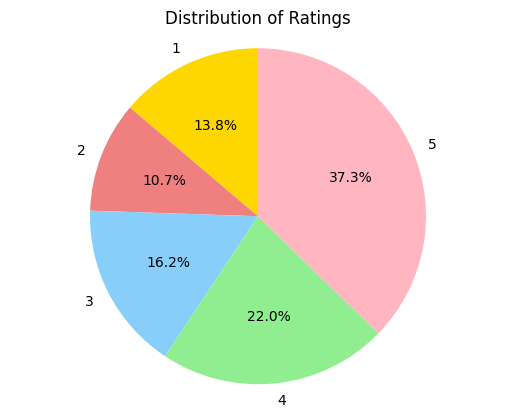

In [ ]:
# ƒê·∫øm s·ªë l∆∞·ª£ng gi√° tr·ªã t·ª´ 1 ƒë·∫øn 5 sao trong c·ªôt 'rating_star'
rating_counts = comments['rating_star'].value_counts().sort_index()

print(rating_counts)
# V·∫Ω bi·ªÉu ƒë·ªì
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.axis('equal')  # ƒê·∫£m b·∫£o bi·ªÉu ƒë·ªì tr√≤n
plt.title('Distribution of Ratings')
plt.show()

C√≥ th·ªÉ th·∫•y r·∫±ng s·ªë l∆∞·ª£t ƒë√°nh gi√° 5 sao chi·∫øm s·ªë l∆∞·ª£ng l·ªõn l√† 5333 l∆∞·ª£t, ƒë·ªìng th·ªùi s·ªë l∆∞·ª£t ƒë√°nh gi√° t·ª´ 3 ƒë·∫øn 5 sao chi·∫øm ph·∫ßn l·ªõn trong b·ªô d·ªØ li·ªáu v·ªõi 75,5% v√† s·ªë l∆∞·ª£t ƒë√°nh gi√° 2 sao chi·∫øm s·ªë l∆∞·ª£ng √≠t nh·∫•t v·ªõi 10,7%.

In [ ]:
import re

# H√†m ƒë·ªÉ lo·∫°i b·ªè emoji t·ª´ m·ªôt chu·ªói
def remove_emoji(text):
    # S·ª≠ d·ª•ng bi·ªÉu th·ª©c ch√≠nh quy ƒë·ªÉ t√¨m v√† x√≥a emoji c√≥ ƒë·ªãnh d·∫°ng <emoji> </emoji>
    emoji_pattern = re.compile(r'<emoji>(.*?)</emoji>')
    return emoji_pattern.sub(r'', text)

# √Åp d·ª•ng h√†m remove_emoji cho c·ªôt 'clean_cmt'
comments['clean_cmt'] = comments['clean_cmt'].apply(remove_emoji)

# In ra comment sau khi xo√° emoji ƒë·ªÉ ki·ªÉm tra
comments['clean_cmt'].head(10)
# for i in range(10):
#   print("Comment after removing emoji:", remove_emoji(comments['clean_cmt'][i]))

0    m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...
1    h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n_ph·∫©m tuy·ªát vo...
2    s·∫£n_ph·∫©m r·∫•t ƒë·∫πp th∆°m shop giao si√™u nhanh ch·∫•...
3     kh√¥ng  kh√¥ng cos  kh√¥ng ch·∫•t_l∆∞·ª£ng s·∫£n_ph·∫©m k...
4    m√†u s·∫Øc ƒëen  c≈©ng ok  ch∆∞a th·∫•y v√¨ r·∫ª l√™n ƒë√°nh...
5     mua ao giao c√°i kh√°c nh·∫Øn_tin shop kh√¥ng tr·∫£_...
6     kh√¥ng ƒë√∫ng ƒë·∫∑t √°o l√¥ng giao qu·∫ßn tr·∫ª_con  ƒë√£ ...
7     kh√¥ng  kh√¥ng ƒë√∫ng v·ªõi ƒë∆°n h√†ng ƒë√£ ƒë·∫∑t  tr·∫Øng ...
8     sai h√†ng  sai h√†ng  sai h√†ng shop l√†m_ƒÉn ki·ªÉu...
9     kh√¥ng dung  sai  sai l√†m ng∆∞·ªùi c√≥ t√¢m t√Ω ƒë√™ l...
Name: clean_cmt, dtype: object


> C√°c comment tr√™n Shopee th∆∞·ªùng s·∫Ω c√≥ nhi·ªÅu emoji, ƒëi·ªÅu ƒë√≥ s·∫Ω l√†m ·∫£nh h∆∞·ªüng qu√° tr√¨nh tr·ª±c quan ho√° d·ªØ li·ªáu v√† k·∫øt qu·∫£ thu ƒë∆∞·ª£c, v√¨ v·∫≠y nh√≥m ti·∫øn h√†nh lo·∫°i b·ªè c√°c emoji xu·∫•t hi·ªán trong c√°c comment



In [ ]:
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("m√†u s·∫Øc","" ))
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("ƒë√∫ng v·ªõi m√¥_t·∫£","" ))
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("ch·∫•t_li·ªáu","" ))
comments['clean_cmt'].head(10)

0    m·∫∑c kh√° m√°t v·∫£i n√†y c≈©ng ·ªïn ƒë·∫πp tuy·ªát v·ªõi cho ...
1    h√†ng giao nhanhh ch·∫•t l∆∞∆°ngg s·∫£n_ph·∫©m tuy·ªát vo...
2    s·∫£n_ph·∫©m r·∫•t ƒë·∫πp th∆°m shop giao si√™u nhanh ch·∫•...
3     kh√¥ng  kh√¥ng cos  kh√¥ng ch·∫•t_l∆∞·ª£ng s·∫£n_ph·∫©m k...
4     ƒëen  c≈©ng ok  ch∆∞a th·∫•y v√¨ r·∫ª l√™n ƒë√°nh_gi√° nƒÉ...
5     mua ao giao c√°i kh√°c nh·∫Øn_tin shop kh√¥ng tr·∫£_...
6     kh√¥ng ƒë√∫ng ƒë·∫∑t √°o l√¥ng giao qu·∫ßn tr·∫ª_con  ƒë√£ ...
7     kh√¥ng  kh√¥ng ƒë√∫ng v·ªõi ƒë∆°n h√†ng ƒë√£ ƒë·∫∑t  tr·∫Øng ...
8     sai h√†ng  sai h√†ng  sai h√†ng shop l√†m_ƒÉn ki·ªÉu...
9     kh√¥ng dung  sai  sai l√†m ng∆∞·ªùi c√≥ t√¢m t√Ω ƒë√™ l...
Name: clean_cmt, dtype: object



> C√°c b√¨nh lu·∫≠n c·ªßa shopee th∆∞·ªùng s·∫Ω m·∫∑c ƒë·ªãnh c√°c m·ª•c nh∆∞ l√† "ƒë√∫ng v·ªõi m√¥ t·∫£", "m√†u s·∫Øc", "ch·∫•t li·ªáu" ƒë·ªÉ kh√°ch h√†ng c√≥ th·ªÉ ƒë√°nh gi√°, tuy nhi√™n, c√°c d·ªØ li·ªáu n√†y c√≥ th·ªÉ l√†m nhi·ªÖu qu√° tr√¨nh tr·ª±c quan ho√° d·ªØ li·ªáu v√† n√≥ kh√¥ng qu√° c·∫ßn thi·∫øt, v√¨ v·∫≠y nh√≥m s·∫Ω ti·∫øn h√†nh lo·∫°i b·ªè c√°c d·ªØ li·ªáu n√†y



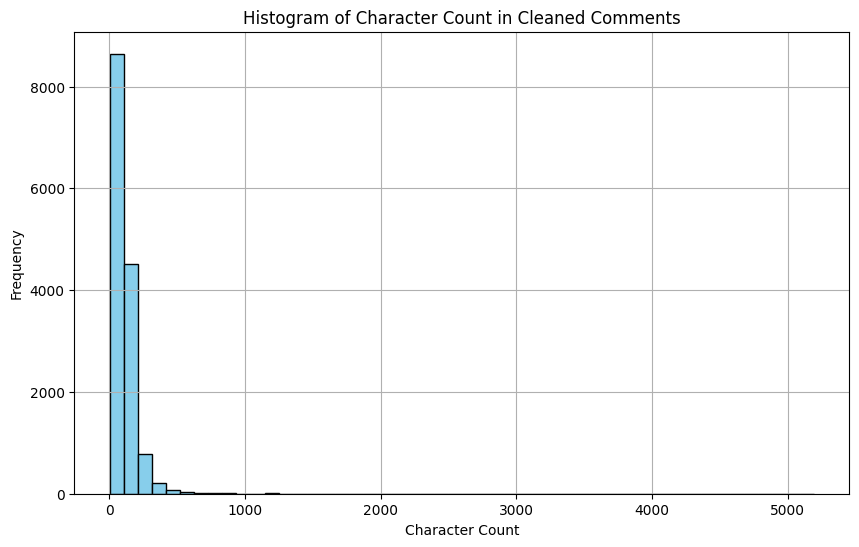

In [ ]:
comments['char_count'] = comments['clean_cmt'].apply(len)

# V·∫Ω bi·ªÉu ƒë·ªì histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['char_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Character Count in Cleaned Comments')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



> Ti·∫øp theo nh√≥m s·∫Ω th·ª±c hi·ªán vi·ªác t√≠nh ƒë·ªô d√†i k√Ω t·ª± c·ªßa c√°c b√¨nh lu·∫≠n sau khi ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω v√† sau ƒë√≥ v·∫Ω bi·ªÉu ƒë·ªì histogram ƒë·ªÉ hi·ªÉn th·ªã ph√¢n ph·ªëi c·ªßa s·ªë l∆∞·ª£ng k√Ω t·ª± trong c√°c b√¨nh lu·∫≠n ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch.


> Nh∆∞ ch√∫ng ta c√≥ th·ªÉ th·∫•y, ƒë·ªô d√†i c·ªßa c√°c b√¨nh lu·∫≠n ph√¢n b·ªï r∆°i v√†o kho·∫£ng 0-400 k√Ω t·ª± chi·∫øm ph·∫ßn l·ªõn






Word Count 0        13
1        11
2        12
3        20
4        23
         ..
14298    28
14299    42
14300    24
14301    14
14302    10
Name: word_count, Length: 14303, dtype: int64


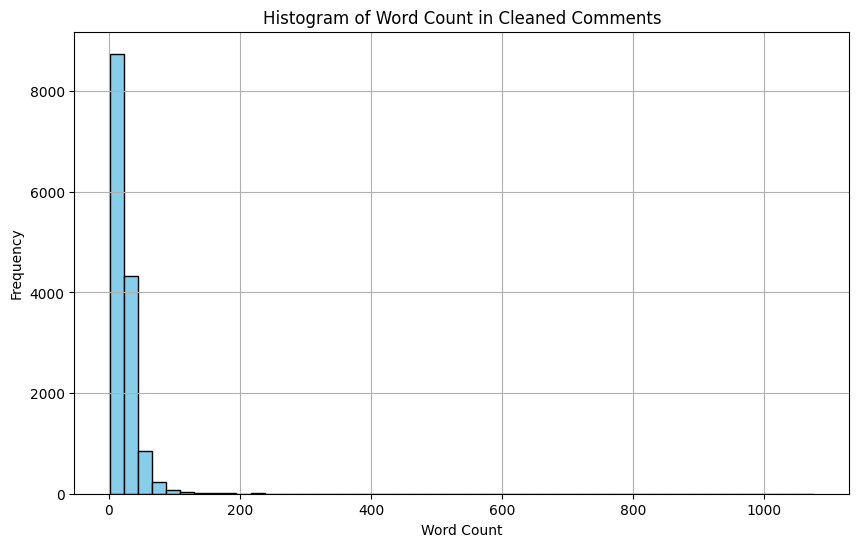

In [ ]:
# ƒê·∫øm s·ªë t·ª´ trong m·ªói comment
comments['word_count'] = comments['clean_cmt'].apply(lambda x: len(x.split()))
#in ra m√†n h√¨nh s·ªë t·ª´ trong comment
print('Word Count', comments['word_count'])
# V·∫Ω bi·ªÉu ƒë·ªì histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Count in Cleaned Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> Ti·∫øp theo nh√≥m th·ª±c hi·ªán vi·ªác ƒë·∫øm s·ªë t·ª´ trong m·ªói b√¨nh lu·∫≠n sau khi ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω, sau ƒë√≥ in ra m√†n h√¨nh s·ªë t·ª´ trong m·ªói b√¨nh lu·∫≠n v√† v·∫Ω bi·ªÉu ƒë·ªì histogram ƒë·ªÉ hi·ªÉn th·ªã ph√¢n ph·ªëi c·ªßa s·ªë t·ª´ trong c√°c b√¨nh lu·∫≠n ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch.


> C√≥ th·ªÉ th·∫•y r·∫±ng s·ªë t·ª´ trong m·ªói b√¨nh lu·∫≠n sau khi x·ª≠ l√Ω r∆°i v√†o kho·∫£ng 0-100 t·ª´ cho m·ªói b√¨nh lu·∫≠n l√† chi·∫øm ƒëa s·ªë







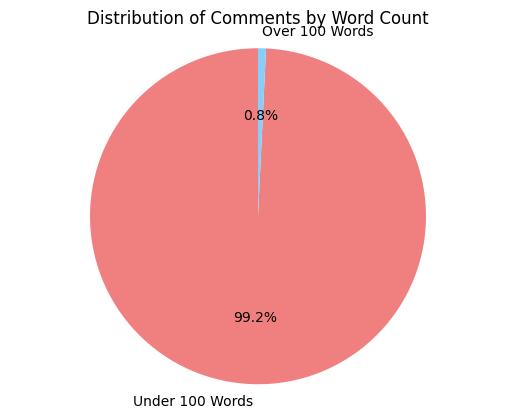

In [ ]:
# T√≠nh s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n d∆∞·ªõi 100 t·ª´ v√† tr√™n 100 t·ª´
under_100_words = (comments['word_count'] < 100).sum()
over_100_words = (comments['word_count'] >= 100).sum()

# T·∫°o danh s√°ch d·ªØ li·ªáu cho bi·ªÉu ƒë·ªì tr√≤n
data = [under_100_words, over_100_words]
labels = ['Under 100 Words', 'Over 100 Words']

# V·∫Ω bi·ªÉu ƒë·ªì tr√≤n
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal')  # ƒê·∫£m b·∫£o bi·ªÉu ƒë·ªì tr√≤n
plt.title('Distribution of Comments by Word Count')
plt.show()

C√°c ƒë√°nh gi√° n·∫±m trong kho·∫£ng t·ª´ 0 - 100 t·ª´ chi·∫øm ƒë·∫øn 99.2%, c√°c ƒë√°nh gi√°: tr√™n 100 t·ª´ ch·ªâ chi·∫øm 0,8%.


Average Word Length: 3.772718711319241


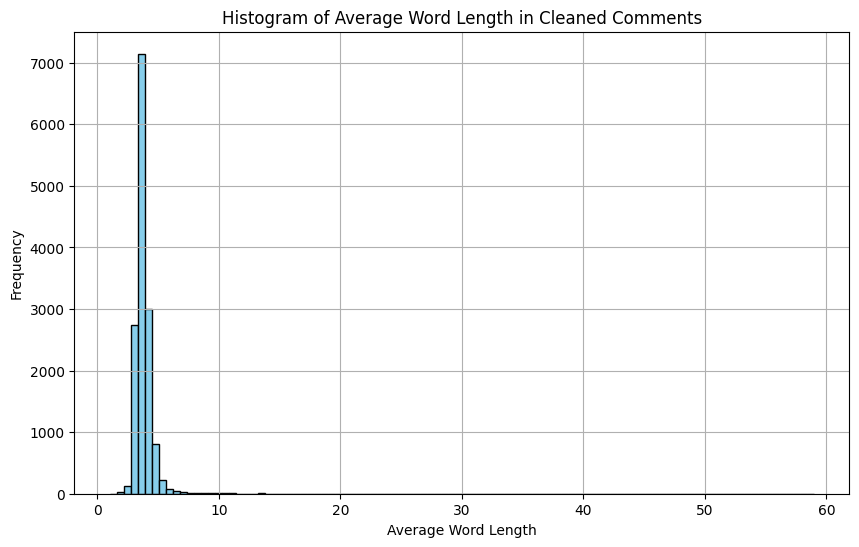

In [ ]:
# T√≠nh ƒë·ªô d√†i trung b√¨nh c·ªßa t·ª´ng t·ª´ trong m·ªói comment v√† l∆∞u v√†o c·ªôt 'avg_word_length'
comments['avg_word_length'] = comments['clean_cmt'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# T√≠nh gi√° tr·ªã trung b√¨nh c·ªßa ƒë·ªô d√†i t·ª´ trong to√†n b·ªô DataFrame
average_word_length = comments['avg_word_length'].mean()

# In gi√° tr·ªã trung b√¨nh
print("Average Word Length:", average_word_length)

# V·∫Ω bi·ªÉu ƒë·ªì histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['avg_word_length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Word Length in Cleaned Comments')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> Nh√≥m th·ª±c hi·ªán t√≠nh ƒë·ªô d√†i trung b√¨nh c·ªßa m·ªói t·ª´ trong m·ªói b√¨nh lu·∫≠n, l∆∞u k·∫øt qu·∫£ v√†o m·ªôt c·ªôt m·ªõi c√≥ t√™n l√† 'avg_word_length'.


> Sau ƒë√≥, t√≠nh gi√° tr·ªã trung b√¨nh c·ªßa ƒë·ªô d√†i t·ª´ tr√™n to√†n b·ªô DataFrame, in gi√° tr·ªã trung b√¨nh ra m√†n h√¨nh v√† v·∫Ω bi·ªÉu ƒë·ªì histogram ƒë·ªÉ hi·ªÉn th·ªã ph√¢n ph·ªëi c·ªßa ƒë·ªô d√†i trung b√¨nh c·ªßa t·ª´ trong c√°c b√¨nh lu·∫≠n ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch.


> Nh∆∞ k·∫øt qu·∫£ tr√™n, ta c√≥ th·ªÉ th·∫•y r·∫±ng ƒë·ªô d√†i trung b√¨nh t·ª´ c·ªßa d·ªØ li·ªáu b√¨nh lu·∫≠n r∆°i v√†o kho·∫£ng 0-10 chi·∫øm ph·∫ßn nhi·ªÅu, v·ªõi gi√° tr·ªã trung b√¨nh l√† 3.772718711319241


In [ ]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# T·∫£i t√†i nguy√™n punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



> Ti·∫øp ƒë√≥ s·ª≠ d·ª•ng th∆∞ vi·ªán NLTK ƒë·ªÉ th·ª±c hi·ªán vi·ªác t·∫£i t√†i nguy√™n "punkt" ƒë·ªÉ c√≥ th·ªÉ s·ª≠ d·ª•ng word tokenization. T√†i nguy√™n "punkt" l√† m·ªôt b·ªô d·ªØ li·ªáu ƒë∆∞·ª£c s·ª≠ d·ª•ng trong vi·ªác ph√¢n t√°ch vƒÉn b·∫£n th√†nh c√°c t·ª´ ho·∫∑c c√¢u. Trong ƒë√≥ bao g·ªìm:


*   Import ph∆∞∆°ng th·ª©c ngrams t·ª´ th∆∞ vi·ªán nltk - s·ª≠ d·ª•ng ƒë·ªÉ t·∫°o ra c√°c n-grams t·ª´ m·ªôt chu·ªói vƒÉn b·∫£n.
*   Import ph∆∞∆°ng th·ª©c word_tokenize t·ª´ th∆∞ vi·ªán nltk - d√πng ƒë·ªÉ t√°ch m·ªôt c√¢u th√†nh c√°c t·ª´ ri√™ng l·∫ª.
*   Import l·ªõp Counter t·ª´ th∆∞ vi·ªán collections - s·ª≠ d·ª•ng ƒë·ªÉ ƒë·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa c√°c ph·∫ßn t·ª≠ trong m·ªôt iterable.







In [ ]:
# Tokenize v√† t·∫°o trigram cho m·ªói comment
comments['clean_cmt_tokens'] = comments['clean_cmt'].apply(word_tokenize)
comments['trigrams'] = comments['clean_cmt_tokens'].apply(lambda x: list(ngrams(x, 3)))

# T√≠nh t·∫ßn su·∫•t c·ªßa trigram
all_trigrams = [trigram for sublist in comments['trigrams'] for trigram in sublist]
trigram_freq = Counter(all_trigrams)

# Hi·ªÉn th·ªã t·∫ßn su·∫•t c·ªßa 10 trigram ph·ªï bi·∫øn nh·∫•t
print("Top 10 Trigrams:")
print(trigram_freq.most_common(10))

Top 10 Trigrams:
[(('giao', 'h√†ng', 'nhanh'), 1291), (('nha', 'm·ªçi', 'ng∆∞·ªùi'), 659), (('v·ªõi', 'gi√°', 'ti·ªÅn'), 630), (('n√™n', 'mua', 'nha'), 515), (('m·ªçi', 'ng∆∞·ªùi', 'n√™n'), 476), (('ng∆∞·ªùi', 'n√™n', 'mua'), 353), (('mang', 't√≠nh_ch·∫•t', 'nh·∫≠n'), 298), (('t√≠nh_ch·∫•t', 'nh·∫≠n', 'xu'), 289), (('kh√¥ng', 'n√™n', 'mua'), 279), (('v·ªõi', 'gi√°', 'n√†y'), 260)]




> Ti·∫øp theo nh√≥m th·ª±c hi·ªán qu√° tr√¨nh tokenize v√† t·∫°o trigram cho m·ªói b√¨nh lu·∫≠n trong DataFrame comments. Sau ƒë√≥, nh√≥m t√≠nh t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa c√°c trigram v√† hi·ªÉn th·ªã 10 trigram ph·ªï bi·∫øn nh·∫•t.


> Vi·ªác n√†y gi√∫p ph√¢n t√≠ch ng·ªØ li·ªáu c·ªßa c√°c trigram, t·ª©c l√† c√°c c·∫∑p t·ª´ li√™n ti·∫øp c√≥ ƒë·ªô d√†i ba, trong c√°c b√¨nh lu·∫≠n ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch. C√°c trigram ph·ªï bi·∫øn s·∫Ω cung c·∫•p th√¥ng tin v·ªÅ ng·ªØ c·∫£nh v√† c√°c bi·ªÉu hi·ªán ng√¥n ng·ªØ ƒë·∫∑c bi·ªát trong t·∫≠p d·ªØ li·ªáu.





<Figure size 1200x600 with 0 Axes>

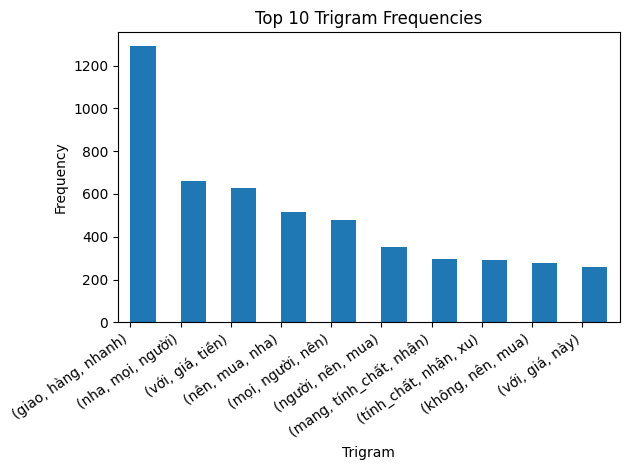

In [ ]:
# V·∫Ω bi·ªÉu ƒë·ªì histogram cho t·∫ßn su·∫•t c·ªßa trigram
plt.figure(figsize=(12, 6))

# Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu Counter th√†nh DataFrame ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì
df_trigram_freq = pd.DataFrame.from_dict(trigram_freq, orient='index', columns=['Frequency'])
df_trigram_freq = df_trigram_freq.sort_values(by='Frequency', ascending=False)[:10]

# V·∫Ω bi·ªÉu ƒë·ªì bar v·ªõi align='edge'
df_trigram_freq.plot(kind='bar', legend=False, align='edge')

plt.title('Top 10 Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=35, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



> Nh√≥m th·ª±c hi·ªán v·∫Ω bi·ªÉu ƒë·ªì th·ªÉ hi·ªán t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa 10 triagram ph·ªï bi·∫øn nh·∫•t


> Ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng, c√°c t·ª´ xu·∫•t hi·ªán nhi·ªÅu nh·∫•t l√† c·ª•m "giao h√†ng nhanh" v·ªõi t·∫ßn su·∫•t r∆°i v√†o kho·∫£ng 1300 l·∫ßn, c√°c c·ª•m t·ª´ c√≤n l·∫°i nh∆∞ "n√™n mua nha", "nha m·ªçi ng∆∞·ªùi",... r∆°i v√†o t·∫ßn su·∫•t xu·∫•t hi·ªán t·ª´ 300-700 l·∫ßn





In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

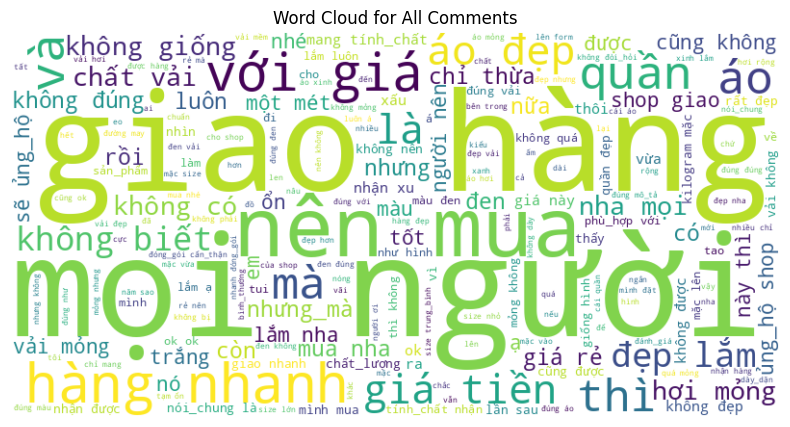

In [ ]:
# K·∫øt h·ª£p n·ªôi dung c·ªßa t·∫•t c·∫£ c√°c comments
all_comments = ' '.join(comments['clean_cmt'].tolist())

# T·∫°o Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# V·∫Ω Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Comments')
plt.show()




> Nh√≥m ti·∫øn h√†nh v·∫Ω wordcloud ƒë·ªÉ hi·ªÉu ƒë∆∞·ª£c s·ª± ph√¢n b·ªë c·ªßa c√°c b√¨nh lu·∫≠n


> Quan s√°t bi·ªÉu ƒë·ªì tr√™n, gi√° tr·ªã 'giao h√†ng', "m·ªçi ng∆∞·ªùi" c√≥ t·∫ßn su·∫•t l·∫∑p l·∫°i nhi·ªÅu nh·∫•t n√™n c√≥ k√≠ch th∆∞·ªõc l·ªõn nh·∫•t v·ªõi xanh l√° tr√™n bi·ªÉu ƒë·ªì. Ti·∫øp theo ƒë√≥ l√† c√°c gi√° tr·ªã nh∆∞: 'n√™n mua', 'h√†ng nhanh',...


> C√°c gi√° tr·ªã c√≥ t·∫ßn su·∫•t l·∫∑p l·∫°i c√†ng √≠t th√¨ m√†u s·∫Øc c√†ng m·ªù v√† c·ª° ch·ªØ c√†ng nh·ªè nh∆∞: 'qu√° m·ªèng', 'ch·ªâ th·ª´a',..



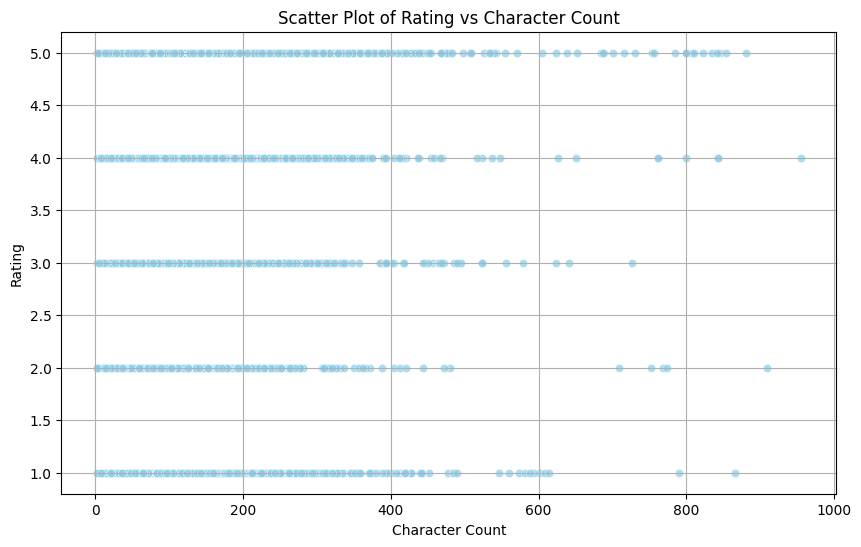

In [ ]:
# Gi·ªõi h·∫°n Character Count t·ª´ 0 ƒë·∫øn 1000
filtered_comments = comments[(comments['char_count'] >= 0) & (comments['char_count'] <= 1000)]
# T·∫°o m·ªôt DataFrame ch·ª©a rating v√† ƒë·ªô d√†i c·ªßa b√¨nh lu·∫≠n
data = pd.DataFrame({'rating_star': comments['rating_star'], 'CharCount': filtered_comments['char_count']})

# V·∫Ω bi·ªÉu ƒë·ªì scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CharCount', y='rating_star', data=data, color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Rating vs Character Count')
plt.xlabel('Character Count')
plt.ylabel('Rating')
plt.grid(True)
plt.show()



> Nh√≥m th·ª±c hi·ªán v·∫Ω bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ª± t∆∞∆°ng quan gi·ªØa rating v·ªõi ƒë·ªô d√†i ng·∫Øn c·ªßa b√¨nh lu·∫≠n, tuy nhi√™n v√¨ c√°c comment s·∫Ω r∆°i v√†o ƒë·ªô d√†i t·ª´ 0-1000 l√† ch·ªß y·∫øu n√™n nh√≥m s·∫Ω gi·ªõi h·∫°n ƒë·ªÉ c√≥ th·ªÉ tr·ª±c quan d·ªØ li·ªáu r√µ h∆°n


> Theo ƒë√≥ c√≥ th·ªÉ th·∫•y c√°c b√¨nh lu·∫≠n c√†ng d√†i s·∫Ω c√≥ rating c√†ng cao r∆°i v√†o 4-5 sao, c√°c b√¨nh lu·∫≠n 1-3 sao c√≥ ƒë·ªô d√†i √≠t h∆°n



